In [24]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_parquet('raw_data.parquet')
duckdb.sql("select count(*) from df")

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│      2226382 │
└──────────────┘

In [26]:
duckdb.sql("select * from df limit 10")

┌─────────────┬──────────┬──────────┬────────┬────────┬──────────┬───────────┬───────────────┬─────────────┬──────────┬────────────┬────────────────┐
│ brokered_by │  status  │  price   │  bed   │  bath  │ acre_lot │  street   │     city      │    state    │ zip_code │ house_size │ prev_sold_date │
│   double    │ varchar  │  double  │ double │ double │  double  │  double   │    varchar    │   varchar   │ varchar  │   double   │      date      │
├─────────────┼──────────┼──────────┼────────┼────────┼──────────┼───────────┼───────────────┼─────────────┼──────────┼────────────┼────────────────┤
│    103378.0 │ for_sale │ 105000.0 │    3.0 │    2.0 │     0.12 │ 1962661.0 │ Adjuntas      │ Puerto Rico │ 00601    │      920.0 │ NULL           │
│     52707.0 │ for_sale │  80000.0 │    4.0 │    2.0 │     0.08 │ 1902874.0 │ Adjuntas      │ Puerto Rico │ 00601    │     1527.0 │ NULL           │
│    103379.0 │ for_sale │  67000.0 │    2.0 │    1.0 │     0.15 │ 1404990.0 │ Juana Diaz    │ Puert

In [27]:
# Descripción general de los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        object 
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(7), object(5)
memory usage: 203.8+ MB
None


In [28]:
# Estadísticas descriptivas
print(df.describe())

        brokered_by         price           bed          bath      acre_lot  \
count  2.221849e+06  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06   
mean   5.293989e+04  5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01   
std    3.064275e+04  2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    2.386100e+04  1.650000e+05  3.000000e+00  2.000000e+00  1.500000e-01   
50%    5.288400e+04  3.250000e+05  3.000000e+00  2.000000e+00  2.600000e-01   
75%    7.918300e+04  5.500000e+05  4.000000e+00  3.000000e+00  9.800000e-01   
max    1.101420e+05  2.147484e+09  4.730000e+02  8.300000e+02  1.000000e+05   

             street    house_size  
count  2.215516e+06  1.657898e+06  
mean   1.012325e+06  2.714471e+03  
std    5.837635e+05  8.081635e+05  
min    0.000000e+00  4.000000e+00  
25%    5.063128e+05  1.300000e+03  
50%    1.012766e+06  1.760000e+03  
75%    1.521173e+06  2.413000e+03  


In [29]:
# Contar valores nulos por columna
print(df.isnull().sum())

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64


In [31]:
# Excluir columnas categóricas para calcular la matriz de correlación
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

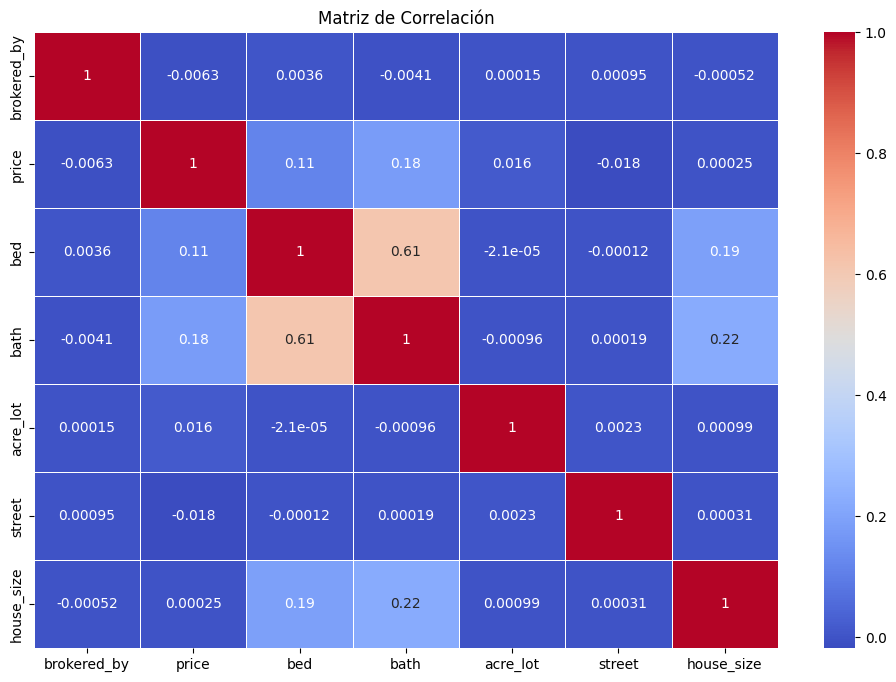

In [32]:
# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()